In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Data Preparation**

In [2]:
drug_label=pd.read_csv("realistic_drug_labels_side_effects.csv")
drug_label

,drug_name,manufacturer,approval_year,drug_class,indications,side_effects,dosage_mg,administration_route,contraindications,warnings,price_usd,batch_number,expiry_date,side_effect_severity,approval_status
0,Seroxetine50,AstraZeneca,1996,Antidepressant,Allergy relief,"Fatigue, Nausea",260,Rectal,Bleeding disorders,Avoid alcohol,192.43,MV388Pl,2026-11-29,Mild,Pending
1,Mecoparin93,AstraZeneca,2018,Vaccine,Allergy relief,Nausea,470,Inhalation,Allergic reaction,Take with food,397.82,UR279ZN,2027-07-14,Mild,Approved
2,Daxozole89,Merck & Co.,1997,Antipsychotic,Allergy relief,"Diarrhea, Blurred vision, Dizziness",330,Sublingual,High blood pressure,Take with food,131.69,we040kH,2028-06-02,Moderate,Pending
3,Viracillin84,Roche Holding AG,2004,Antifungal,Inflammation reduction,"Fatigue, Dry mouth",450,Oral,Kidney impairment,Do not operate machinery,372.82,hO060rh,2026-07-07,Mild,Rejected
4,Amoxstatin62,Pfizer Inc.,2003,Antidepressant,Psychosis control,"Insomnia, Dry mouth, Fatigue",430,Topical,Bleeding disorders,Do not operate machinery,281.48,Fa621Sw,2027-12-28,Moderate,Pending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Mecozole92,Pfizer Inc.,1993,Antihistamine,Fungal infections,Dry mouth,850,Inhalation,Liver disease,May affect fertility,47.48,Kv961uR,2026-01-20,Moderate,Rejected
1432,Amoxvir17,GlaxoSmithKline,2010,Antihistamine,Fungal infections,"Nausea, Fatigue, Headache",880,Inhalation,Diabetes,May affect fertility,235.37,Uc964RO,2027-09-28,Severe,Rejected
1433,Zylovir17,Pfizer Inc.,2007,Antibiotic,Fever reduction,"Insomnia, Dizziness",960,Topical,Asthma,Do not operate machinery,145.09,Fq361YH,2026-02-08,Moderate,Rejected
1434,Mecoprofen32,GlaxoSmithKline,1994,Antifungal,Bacterial infections,Headache,670,Topical,Asthma,May cause drowsiness,263.19,qM405ML,2028-05-13,Severe,Pending


In [3]:
drug_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   drug_name             1436 non-null   object 
 1   manufacturer          1436 non-null   object 
 2   approval_year         1436 non-null   int64  
 3   drug_class            1436 non-null   object 
 4   indications           1436 non-null   object 
 5   side_effects          1436 non-null   object 
 6   dosage_mg             1436 non-null   int64  
 7   administration_route  1436 non-null   object 
 8   contraindications     1436 non-null   object 
 9   warnings              1436 non-null   object 
 10  price_usd             1436 non-null   float64
 11  batch_number          1436 non-null   object 
 12  expiry_date           1436 non-null   object 
 13  side_effect_severity  1436 non-null   object 
 14  approval_status       1436 non-null   object 
dtypes: float64(1), int64(

In [4]:
drug_label.columns

Index(['drug_name', 'manufacturer', 'approval_year', 'drug_class',
       'indications', 'side_effects', 'dosage_mg', 'administration_route',
       'contraindications', 'warnings', 'price_usd', 'batch_number',
       'expiry_date', 'side_effect_severity', 'approval_status'],
      dtype='object')

In [5]:
drug_label.isnull().sum()

drug_name               0
manufacturer            0
approval_year           0
drug_class              0
indications             0
side_effects            0
dosage_mg               0
administration_route    0
contraindications       0
warnings                0
price_usd               0
batch_number            0
expiry_date             0
side_effect_severity    0
approval_status         0
dtype: int64

In [6]:
drug_label.describe()

,approval_year,dosage_mg,price_usd
count,1436.000000,1436.000000,1436.000000
mean,2006.860028,509.637883,251.844854
std,10.167067,286.417268,142.640781
min,1990.000000,10.000000,1.210000
25%,1998.000000,270.000000,128.830000
50%,2007.000000,515.000000,255.130000
75%,2016.000000,760.000000,372.207500
max,2024.000000,990.000000,499.060000


In [7]:
drug_label.head(10)

,drug_name,manufacturer,approval_year,drug_class,indications,side_effects,dosage_mg,administration_route,contraindications,warnings,price_usd,batch_number,expiry_date,side_effect_severity,approval_status
0,Seroxetine50,AstraZeneca,1996,Antidepressant,Allergy relief,"Fatigue, Nausea",260,Rectal,Bleeding disorders,Avoid alcohol,192.43,MV388Pl,2026-11-29,Mild,Pending
1,Mecoparin93,AstraZeneca,2018,Vaccine,Allergy relief,Nausea,470,Inhalation,Allergic reaction,Take with food,397.82,UR279ZN,2027-07-14,Mild,Approved
2,Daxozole89,Merck & Co.,1997,Antipsychotic,Allergy relief,"Diarrhea, Blurred vision, Dizziness",330,Sublingual,High blood pressure,Take with food,131.69,we040kH,2028-06-02,Moderate,Pending
3,Viracillin84,Roche Holding AG,2004,Antifungal,Inflammation reduction,"Fatigue, Dry mouth",450,Oral,Kidney impairment,Do not operate machinery,372.82,hO060rh,2026-07-07,Mild,Rejected
4,Amoxstatin62,Pfizer Inc.,2003,Antidepressant,Psychosis control,"Insomnia, Dry mouth, Fatigue",430,Topical,Bleeding disorders,Do not operate machinery,281.48,Fa621Sw,2027-12-28,Moderate,Pending
5,Loxocillin72,Johnson & Johnson,2023,Antifungal,Viral infections,"Rash, Dizziness",180,Intravenous,Bleeding disorders,May affect fertility,463.28,Nl465Ez,2025-12-15,Moderate,Rejected
6,Fenoxetine43,AstraZeneca,2004,Anti-inflammatory,Psychosis control,Blurred vision,500,Topical,Bleeding disorders,May affect fertility,320.77,Id480PC,2025-10-24,Mild,Pending
7,Fenomab17,GlaxoSmithKline,2018,Analgesic,Bacterial infections,Nausea,570,Inhalation,Seizures,Avoid alcohol,57.48,XK920cq,2026-09-27,Severe,Approved
8,Cefparin42,Sanofi,2012,Analgesic,Prevent infectious disease,Dry mouth,420,Oral,Asthma,Avoid alcohol,251.97,TU342KC,2026-10-04,Moderate,Approved
9,Rivaprofen81,GlaxoSmithKline,2013,Antibiotic,Bacterial infections,"Insomnia, Fatigue, Headache",580,Intramuscular,Pregnancy,Take with food,4.48,LQ578uz,2025-10-25,Severe,Approved


**Exploratory Data Analysis**

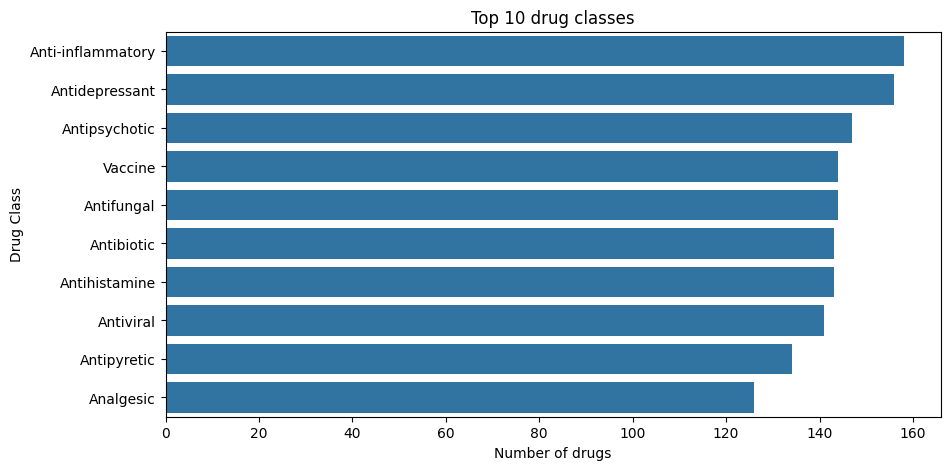

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=drug_label, y="drug_class",order=drug_label["drug_class"].value_counts().index[:10])
plt.title("Top 10 drug classes")
plt.xlabel("Number of drugs")
plt.ylabel("Drug Class")
plt.show()

This  draws the top 10 most common drug classes and how many drugs are in each class.The graph mainly shows the categorization of drugs. THe hiighest number of drugs are primarly the anti-inflammatory drugs with more than 140 numbers being manufactured in profduction and the lowest is analgenic. Antiviral drugs, antibiotic and vaccines are almost upto 140 in nukmber.

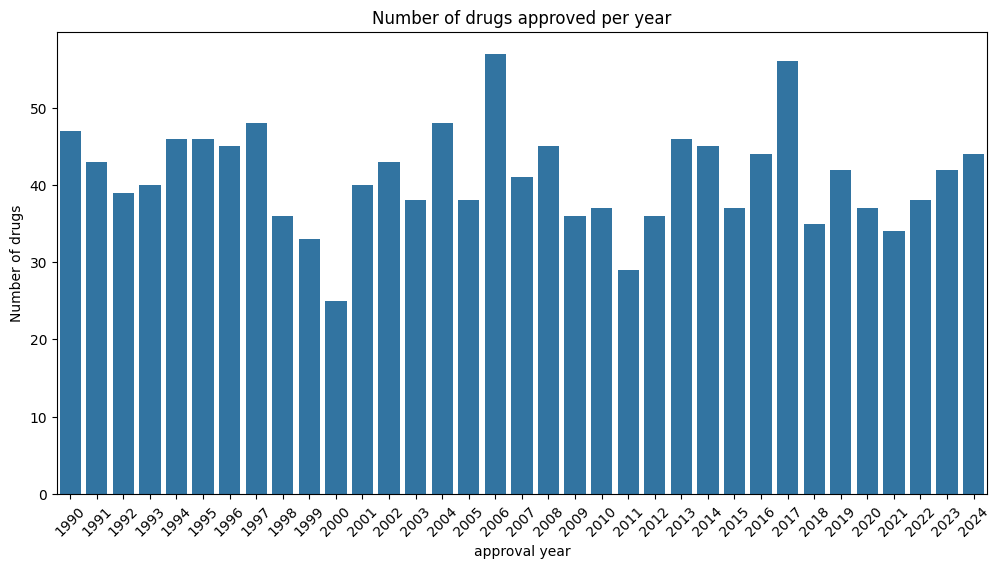

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=drug_label, x="approval_year")
plt.xticks(rotation=45)
plt.title("Number of drugs approved per year")
plt.xlabel("approval year")
plt.ylabel("Number of drugs")
plt.show()

shows ho many drugs approved each year. Overall the highest number of approval was identified in 2007 and 2017 more than 50 number of drugs were approved. while, before 2000,less than 50 drugs were approved. The graph tends to increase slightly over the years, whwere the number starts to increase from the year 2000 to 2007 then decrease till 2011. After 2011, the number of drugs approved starts to increase again till 2017, after which the approval decline gradually till 2014.

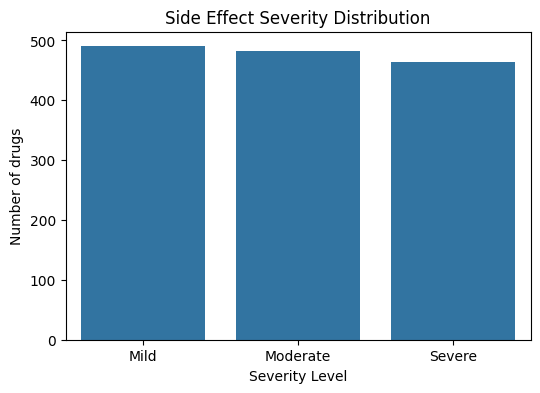

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=drug_label, x="side_effect_severity")
plt.title("Side Effect Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Number of drugs")
plt.show()

The characterization of drug is based on its severity. Overall, there are almost 500 drugs that are known to be mild based on their side effects. While others have shown to moderate to severe level

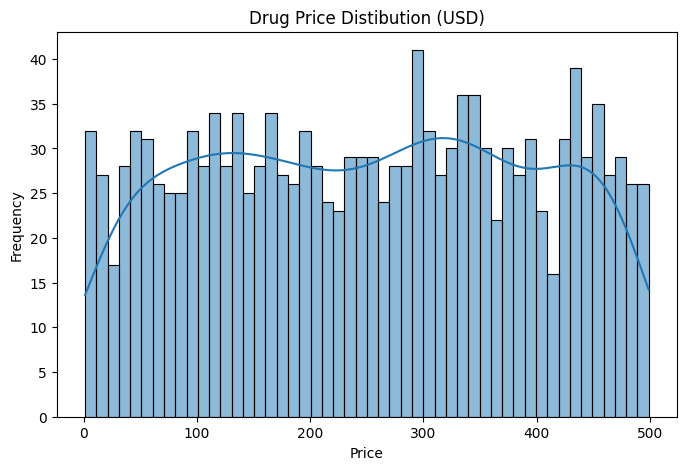

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(drug_label["price_usd"],bins=50,kde=True)
plt.title("Drug Price Distibution (USD)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

The fluctuation expecially an increase in price increase as the number of drugs are being manufactured

C:\Users\User\AppData\Local\Temp\ipykernel_8900\2793598665.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette="viridis")


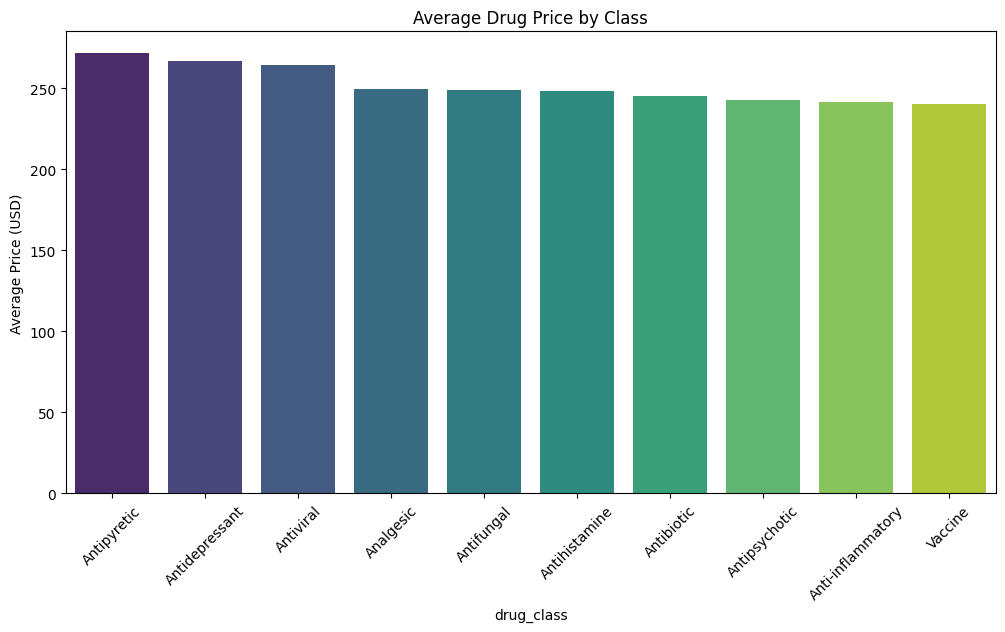

In [12]:
plt.figure(figsize=(12,6))
avg_price = drug_label.groupby("drug_class")["price_usd"].mean().sort_values(ascending=False)

sns.barplot(x=avg_price.index, y=avg_price.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Average Price (USD)")
plt.title("Average Drug Price by Class")
plt.show()

The graph clearly indicates that Antipyretic, Antidepressants, Antiviral are the highest paying drugs in the market aand lowest are the vaccines.

C:\Users\User\AppData\Local\Temp\ipykernel_8900\1549455788.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_dosage.index, y=avg_dosage.values, palette="magma")


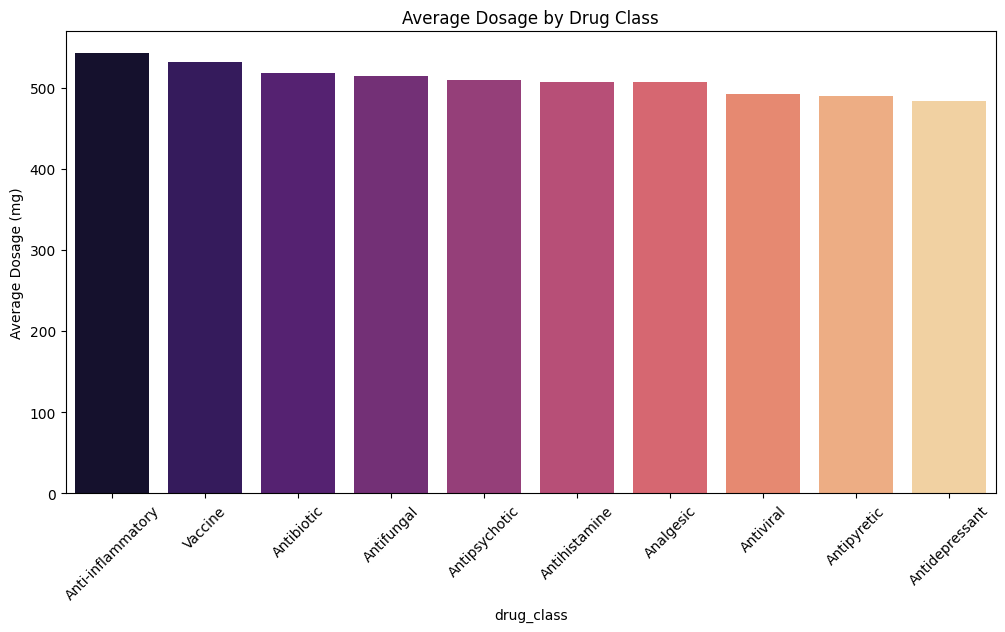

In [13]:
plt.figure(figsize=(12,6))
avg_dosage = drug_label.groupby("drug_class")["dosage_mg"].mean().sort_values(ascending=False)

sns.barplot(x=avg_dosage.index, y=avg_dosage.values, palette="magma")
plt.xticks(rotation=45)
plt.ylabel("Average Dosage (mg)")
plt.title("Average Dosage by Drug Class")
plt.show()

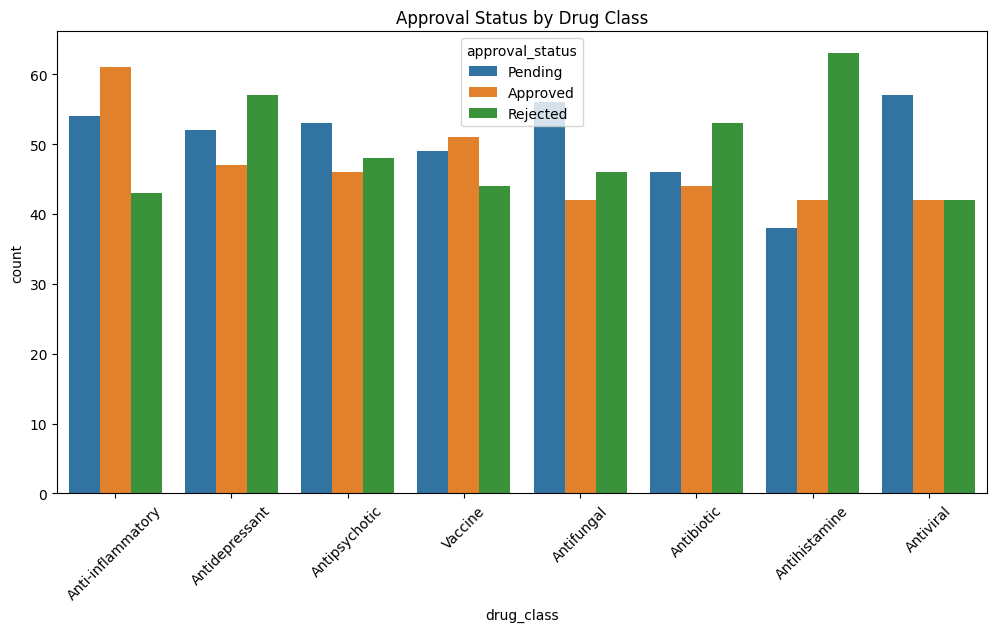

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data=drug_label, x="drug_class", hue="approval_status", order=drug_label["drug_class"].value_counts().index[:8])
plt.xticks(rotation=45)
plt.title("Approval Status by Drug Class")
plt.show()

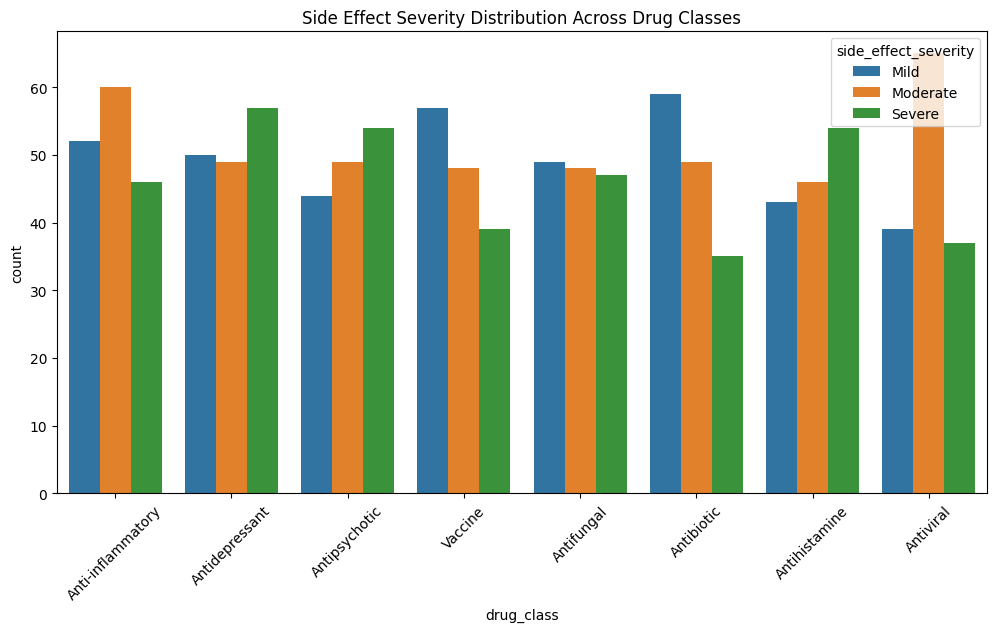

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=drug_label, x="drug_class", hue="side_effect_severity", order=drug_label["drug_class"].value_counts().index[:8])
plt.xticks(rotation=45)
plt.title("Side Effect Severity Distribution Across Drug Classes")
plt.show()